In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Prepare dataset

In [2]:
mnist = fetch_openml('mnist_784')
#minst = fetch_openml('MNIST original')

In [3]:
mnist.target = mnist.target.astype(np.int8)

In [4]:
x = mnist['data']
y = mnist['target']

In [5]:
print(x.dtype, y.dtype)
print(x.shape, y.shape)

float64 int8
(70000, 784) (70000,)


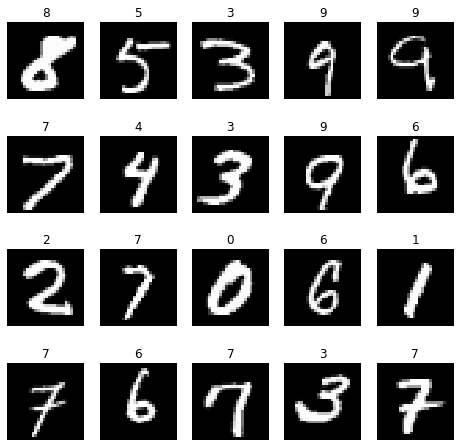

In [6]:
def plot_images(images, labels):
    n_cols = min(5, len(images))
    n_rows = len(images) // n_cols
    fig = plt.figure(figsize=(8, 8))
    
    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i], cmap=plt.cm.gray)
        #sp.set_title("Label = {}".format(labels[i])
        sp.set_title(labels[i])
    plt.show()
    
# lets plot random 20 images
p = np.random.permutation(len(x))
p = p[:20]
plot_images(x[p].reshape(-1,28,28),y[p])
        

In [7]:
#y = y.astype("int32")

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99, stratify = y)

In [9]:
x_train.shape, x_test.shape

((49000, 784), (21000, 784))

In [10]:
y_train.shape, y_test.shape

((49000,), (21000,))

Train Model

In [11]:
naive_classifier = MultinomialNB()
#naive_classifier = GaussianNB()
naive_classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Evaluation of Model

In [12]:
y_pred = naive_classifier.predict(x_test)

In [13]:
y_pred[0:10]

array([1, 3, 1, 0, 5, 9, 3, 9, 3, 6], dtype=int8)

To check the prediction from y_test

In [14]:
y_test[0:10]

array([1, 3, 1, 0, 8, 5, 8, 9, 5, 6], dtype=int8)

In [15]:
print ("Accuracy = {} %".format(accuracy_score(y_test, y_pred)*100))

Accuracy = 82.78095238095237 %


In [16]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2071
           1       0.88      0.93      0.91      2363
           2       0.87      0.84      0.86      2097
           3       0.80      0.80      0.80      2142
           4       0.85      0.75      0.80      2047
           5       0.85      0.66      0.74      1894
           6       0.87      0.90      0.89      2063
           7       0.94      0.83      0.88      2188
           8       0.65      0.78      0.71      2048
           9       0.70      0.84      0.76      2087

    accuracy                           0.83     21000
   macro avg       0.84      0.82      0.83     21000
weighted avg       0.84      0.83      0.83     21000



Confusion matrix

In [17]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_mat

array([[1889,    2,   14,    9,    4,   27,   32,    0,   91,    3],
       [   0, 2205,   21,    7,    1,   10,   10,    1,  101,    7],
       [  22,   27, 1758,   43,   18,    3,   99,   13,  111,    3],
       [   9,   45,  115, 1708,    8,   42,   20,   17,  110,   68],
       [   5,    7,   11,    2, 1536,    6,   39,    6,   80,  355],
       [  47,   12,   21,  229,   40, 1250,   50,    5,  178,   62],
       [  22,   43,   28,    2,    6,   53, 1867,    0,   42,    0],
       [   8,   45,    9,    9,   43,    1,    3, 1812,   70,  188],
       [  10,  109,   31,  107,   25,   61,   16,    6, 1601,   82],
       [  12,   11,    7,   25,  134,    9,    1,   61,   69, 1758]],
      dtype=int64)

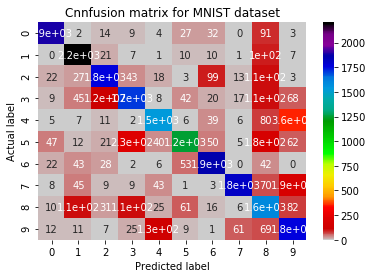

In [18]:
s = sns.heatmap(conf_mat, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Cnnfusion matrix for MNIST dataset')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
None

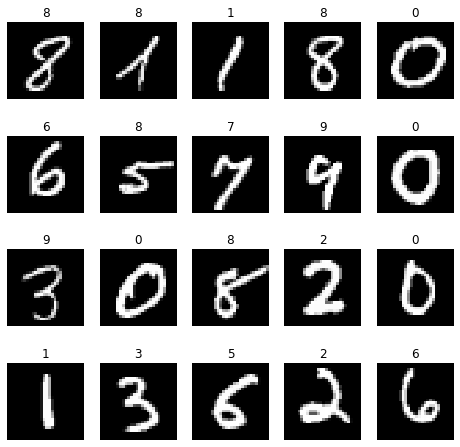

In [19]:
indx = np.random.permutation(len(x_test))
indx = indx[:20]
plot_images(x_test[indx].reshape(-1,28,28), y_pred[indx])